## Import Requirements

In [1]:
import qutip
import numpy as np
from numpy.linalg import matrix_power


adag = qutip.destroy(3).full().T
matrix_power(np.kron(adag, adag), 2)

array([[0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j],
       [2.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j]])

In [2]:
# %matplotlib inline
from pathlib import Path
from copy import copy
from matplotlib import pyplot as plt

from scipy import sparse as sp

import numpy as np

from scipy import optimize

from sequence.components.polarizationFock.node_definitions import *
from sequence.components.polarizationFock_Tensor.light_source import SPDCSource
from sequence.components.polarizationFock_Tensor.rotator import Rotator
from sequence.components.photon import Photon

from sequence.kernel.timeline import Timeline
from sequence.kernel.quantum_manager import POLARIZATION_FOCK_FORMALISM, POLARIZATION_FOCK_TENSOR_FORMALISM

import json
import csv

/home/asingal/home/.venv/lib/python3.10/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)
/home/asingal/home/.venv/lib/python3.10/site-packages/cotengra/hyperoptimizers/hyper.py:33: UserWarning: Couldn't import `kahypar` - skipping from default hyper optimizer and using basic `labels` method instead.
  warnings.warn(


In [3]:
N = 2
timeline = Timeline(formalism = POLARIZATION_FOCK_TENSOR_FORMALISM, truncation = N-1, error_tolerance = 1e-10)

photon1, photon2 = SPDCSource("src", timeline, mean_photon_num=1).emit(num_emissions = 1, debug = True)

def generate_labels(num_systems, N):
    dim = N**2
    labels = []
    state_labels = []
    for i in range(dim):
        state_labels.append(f"{i//N}H{i%N}V")
    # print("sates:", self.state_labels)
    for i in range(dim**num_systems):
        new_label = ""
        for j in range(num_systems-1, -1, -1):
            # print("appending to labels:", f"{self.state_labels[(i//self.dim**j)%self.dim]}_{chr(65+j)} ")
            new_label += f"{state_labels[(i//dim**j)%dim]}_{chr(65+j)} "
        labels.append(new_label[:-1])
    return labels


def read_quantum_state(TN_state, N):
    dense_state = TN_state.to_dense()
    dense_state = np.reshape(dense_state.data, (-1, 1), order = 'C')
    dense_state = sp.csr_matrix(dense_state)
    dense_state.data = np.round(dense_state.data, 10)
    dense_state.eliminate_zeros()

    labels = generate_labels(2,N)
    state = dense_state.nonzero()[0]
    print("Corresponding Basis terms:")
    for k in state: print(labels[k],"-",k,"-",dense_state[k].data)

type: <class 'quimb.tensor.tensor_1d.MatrixProductState'>
Corresponding Basis terms:
0H0V_B 0H0V_A - 0 - [0.5+0.j]
0H1V_B 0H1V_A - 5 - [0.5+0.j]
1H0V_B 1H0V_A - 10 - [0.5+0.j]
1H1V_B 1H1V_A - 15 - [0.5+0.j]
type: <class 'quimb.tensor.tensor_1d.MatrixProductState'>
MatrixProductState([
    Tensor(shape=(2, 2), inds=('_f6ffd7AAAAH', 'k3'), tags=oset(['I3', '$TMSV_V$', 'L1', 'In', 'L0']), left_inds=('k3',)),
    Tensor(shape=(4, 2, 2), inds=('_f6ffd7AAAAG', 'k2', '_f6ffd7AAAAH'), tags=oset(['I2', '$PBS_S$', 'L1', 'In', 'L0']), left_inds=('k2', '_f6ffd7AAAAH')),
    Tensor(shape=(2, 2), inds=('k0', '_f6ffd7AAAAF'), tags=oset(['I0', 'self.name', 'L1', '$PBS_I$', 'In', 'L0', '$PBS_S$', '$TMSV_H$'])),
    Tensor(shape=(2, 2, 4), inds=('_f6ffd7AAAAF', 'k1', '_f6ffd7AAAAG'), tags=oset(['I1', 'self.name', 'L1', '$TMSV_V$', 'In', 'L0']), left_inds=('k1', '_f6ffd7AAAAG')),
], tensors=4, indices=7, L=4, max_bond=4)
Corresponding Basis terms:
0H0V_B 0H0V_A - 0 - [0.5+0.j]
0H1V_B 0H1V_A - 5 - [0.3535

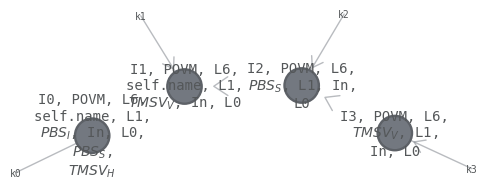

In [4]:
# timeline.quantum_manager.states[photon1.quantum_state].state[0]
print("type:", type(timeline.quantum_manager.states[photon1.quantum_state].state))

read_quantum_state(timeline.quantum_manager.states[photon1.quantum_state].state, N)

rotator = Rotator("rot", timeline)

rotator.rotate(np.pi/2)

photon1 = rotator.get(photon1)

print("type:", type(timeline.quantum_manager.states[photon1.quantum_state].state))
print(timeline.quantum_manager.states[photon1.quantum_state].state)

read_quantum_state(timeline.quantum_manager.states[photon1.quantum_state].state, N)

prob, mps = timeline.quantum_manager.measure([0,1], [0,1,2,3], outcomes = [1,1,1,1], efficiencies = [1,1,1,1])
print(prob)
mps.draw()

## Simulation Setup

In [5]:
# Working simulation setup

params = {
    # Light source
    "QUANTUM_WAVELENGTH" : 1550.,  # Not used for CLEO experiment
    "SPDC_FREQUENCY" : 1e8,  # Not used in present scheme since we are finding probabilities per emission
    "MEAN_PHOTON_NUM" : 0.0597, # np.linspace(0.0001, .005, num=15, endpoint=True),  # Unknown. Needs to be inferenced from simulations 

    # detectors
    "SIGNAL_DET_EFFICIENCY" : None, # Needs to be inferred from simulation (Ask Anirudh first)
    "IDLER_DET_EFFICIENCY" : None,  # Needs to be inferred from simulation (Ask Anirudh first)
    "SIGNAL_DET_DARK" : 0,
    "IDLER_DET_DARK" : 0,
    
    "TEMPORAL_COINCIDENCE_WINDOW": 400,
    "RESOLUTION": 20.,
    "SIGNAL_DET_DEAD" : 5000,
    "IDLER_DET_DEAD" : 5000,

    # fibers
    "SIGNAL_DIST" : 6.1, 
    "IDLER_DIST" : 6.1,  
    "QUNATUM_ATTENUATION" : 7.1/6.1,  # attenuation rate of optical fibre (in dB/km)
    "QUANTUM_INDEX" : 1.471,
    'POLARIZATION_FIDELITY': 0.3,

    # experiment settings
    "num_bs_trials_per_phase" : 1,
    "phase_settings" : (np.linspace(0, 2*np.pi, num=50, endpoint=False)),
    "MODE_NUM": 4,
}

## Network Setup

In [6]:
def setup_network(timeline, params):
    signal_receiver_port_name = "signal_receiver_port"
    idler_receiver_port_name = "idler_receiver_port"

    receiver_port_list = [signal_receiver_port_name, idler_receiver_port_name]

    source_node_name = "Polariation_source_node"

    port_list = receiver_port_list
    detection_module = QSDetectorFockDirect(name = "detection_module", timeline=timeline, port_list=port_list)

    for i in range(len(port_list)):
        detection_module.set_detector(i, efficiency=params["IDLER_DET_EFFICIENCY"], dark_count=params["IDLER_DET_DARK"], count_rate=int(25e6), time_resolution=params["RESOLUTION"], dead_time=params["IDLER_DET_DEAD"])

    signal_receiver = PolarizationReceiverNode(signal_receiver_port_name, timeline, params, detectors = detection_module, port_list=receiver_port_list)
    idler_receiver = proxyReceiver(idler_receiver_port_name, timeline, signal_receiver)

    source_node = PolarizationDistributionNode(source_node_name, timeline, signal_receiver_port_name, idler_receiver_port_name, params)

    qc_signal = add_quantum_channel(source_node, signal_receiver, timeline, distance = params["SIGNAL_DIST"], attenuation = params["QUNATUM_ATTENUATION"], density_matrix_tacking = True)
    qc_idler = add_quantum_channel(source_node, idler_receiver, timeline, distance = params["IDLER_DIST"], attenuation = params["QUNATUM_ATTENUATION"], density_matrix_tacking = True)

    return signal_receiver, source_node

In [7]:
# trunc = 3
# signal_receiver, source_node = setup_network(Timeline(1e12, formalism=POLARIZATION_FOCK_FORMALISM, truncation = trunc), params)
# signal_receiver.detectors.init()
# signal_receiver.set_det_eff(1)
# povms = signal_receiver.detectors._generate_joint_povm_pair(asTuple=False)
# print(povms)

In [8]:
# import qutip as qt
# import math
# from scipy import sparse as sp
# create = qt.create(trunc).full()
# destroy = qt.destroy(trunc).full()

# op = sum([((-1)**i) * np.linalg.matrix_power(create, (i+1)) @ np.linalg.matrix_power(destroy, (i+1)) / math.factorial(i+1) for i in range(trunc)])
# opop = np.kron(op,op)
# opop = opop@opop
# print(sp.csr_matrix(opop))

## Run simulation and data acquisition

In [9]:
# Working Run code
coincidences = []
idler_singles = []
signal_singles = []
coincidence_std = []
# det_effs = [-25.63] # np.linspace(-24, -28, 30) # [-25.333] # np.linspace(-25, -25.5, 10)
det_effs = np.linspace(-24, -27, 20)
# truncations = range(2,9)
truncations = [3]
trunc = 3

fiber_losses = [7.1]

# eff = -25.586
eff = 0 # dBm (Perfect detector, just for kicks)
# eff = -7 # just for kicks
# eff = -40 # just for kicks
# det_effs = [-22]

# idler_angles = [0, np.pi/2, np.pi, 3*np.pi/2]
idler_angles = [0]

for eff in det_effs:
    params["SIGNAL_DET_EFFICIENCY"] = 10**(eff/10)
    params["IDLER_DET_EFFICIENCY"] = 10**(eff/10)

    for att in fiber_losses:
        params["QUNATUM_ATTENUATION"] = att/6.1 # This is the loss in dB/km. The distance travelled in the experiment was 6.1km
        timeline = Timeline(1e12, formalism=POLARIZATION_FOCK_FORMALISM, truncation = trunc)
        signal_receiver, source_node = setup_network(timeline, params)


        for idler_phase in idler_angles:    

            print("\nNew Idler phase:", idler_phase)
            signal_receiver.rotateIdler(idler_phase)
            for signal_phase in params["phase_settings"]:
                timeline.init()
                print("New Signal phase:", signal_phase)
                signal_receiver.rotateSignal(signal_phase)

                for j in range(params["num_bs_trials_per_phase"]):
                    source_node.start()
                    timeline.run()

                signal_receiver.collectSignalData()
            signal_receiver.reset()

        new_coincidences, new_signal_singles, new_idler_singles, new_coincidence_std = signal_receiver.get_data()
        signal_singles.append(new_signal_singles.copy())
        idler_singles.append(new_idler_singles.copy())
        coincidences.append(new_coincidences.copy())
        coincidence_std.append(new_coincidence_std.copy())


print(signal_singles) 
print(idler_singles)
print(coincidences)
print(coincidence_std)





/home/asingal/home/.venv/lib/python3.10/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:412: SparseEfficiencyWarning: splu converted its input to CSC format
  warn('splu converted its input to CSC format', SparseEfficiencyWarning)
/home/asingal/home/.venv/lib/python3.10/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:302: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  warn('spsolve is more efficient when sparse b '
/home/asingal/home/.venv/lib/python3.10/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])



New Idler phase: 0
New Signal phase: 0.0
Output: ['0H0V_D 0H0V_C 0H0V_B 0H0V_A', '0H0V_D 0H0V_C 0H1V_B 0H1V_A', '0H0V_D 0H0V_C 0H2V_B 0H2V_A', '0H0V_D 0H0V_C 0H3V_B 0H3V_A', '0H0V_D 0H0V_C 1H0V_B 1H0V_A', '0H0V_D 0H0V_C 1H1V_B 1H1V_A', '0H0V_D 0H0V_C 1H2V_B 1H2V_A', '0H0V_D 0H0V_C 1H3V_B 1H3V_A', '0H0V_D 0H0V_C 2H0V_B 2H0V_A', '0H0V_D 0H0V_C 2H1V_B 2H1V_A', '0H0V_D 0H0V_C 2H2V_B 2H2V_A', '0H0V_D 0H0V_C 2H3V_B 2H3V_A', '0H0V_D 0H0V_C 3H0V_B 3H0V_A', '0H0V_D 0H0V_C 3H1V_B 3H1V_A', '0H0V_D 0H0V_C 3H2V_B 3H2V_A', '0H0V_D 0H0V_C 3H3V_B 3H3V_A']
entangled_state indices: [  0  17  34  51  68  85 102 119 136 153 170 187 204 221 238 255]


ValueError: unrecognized csr_matrix constructor usage

In [8]:
print((coincidences[0][0]))

import matplotlib
matplotlib.rc('font',family='serif')

min_diff_index = 0
# idler_angles = [0, np.pi/2, np.pi, 3*np.pi/2]

avg_visibility = 0
for i in range(len(idler_angles)):
    visibility = (max(coincidences[min_diff_index][i]) - min(coincidences[min_diff_index][i]))/(max(coincidences[min_diff_index][i]) + min(coincidences[min_diff_index][i]))
    print("Visibility idler:",  visibility)
    avg_visibility += visibility/len(idler_angles)
print("Average visibility:", avg_visibility)

def sinusoid(x, a, b, c, d):
    return a * np.sin(b * x + c) + d

# Creating fitting curves
fringe_domain = np.array(params["phase_settings"])
params0, _ = optimize.curve_fit(sinusoid, fringe_domain, coincidences[0][0], p0=(80,1,1,1))
params1, _ = optimize.curve_fit(sinusoid, fringe_domain, coincidences[1][0], p0=(80,1,1,1))
params2, _ = optimize.curve_fit(sinusoid, fringe_domain, coincidences[2][0], p0=(80,1,1,1))
params3, _ = optimize.curve_fit(sinusoid, fringe_domain, coincidences[3][0], p0=(80,1,1,1))

TNRfont = {'fontname':'serif'}

# Now, creating actual plots.

# Create figure and first axis
fig, ax1 = plt.subplots(figsize=(12,5))
plt.xticks(fontsize=12)
# Plotting sinusoidal fits
ax1.errorbar(fringe_domain, sinusoid(fringe_domain, *params0), fmt = 'b-x', label = "Simulated\nHvis", linewidth = 2.5)
ax1.errorbar(fringe_domain, sinusoid(fringe_domain, *params1), fmt = 'k-x', label = "Simulated\nLvis", linewidth = 2.5)
ax1.errorbar(fringe_domain, sinusoid(fringe_domain, *params2), fmt = 'm-x', label = "Simulated\nVvis", linewidth = 2.5)
ax1.errorbar(fringe_domain, sinusoid(fringe_domain, *params3), fmt = 'r-x', label = "Simulated\nRvis", linewidth = 2.5)
ax1.legend()

[np.float64(0.01399646379491424), np.float64(0.013943614403495615), np.float64(0.013785934604691682), np.float64(0.013526011505739984), np.float64(0.013168106797837382), np.float64(0.012718077397346024), np.float64(0.012183270900505814), np.float64(0.011572389701973015), np.float64(0.010895343195778543), np.float64(0.010163068104815631), np.float64(0.009387344597040388), np.float64(0.008580591799319928), np.float64(0.007755665197254913), np.float64(0.006925638798054614), np.float64(0.006103601400182685), np.float64(0.005302448700938767), np.float64(0.004534679204197522), np.float64(0.0038122170960140597), np.float64(0.0031462219008311677), np.float64(0.0025469380011280698), np.float64(0.0020235454966831927), np.float64(0.0015840315991353419), np.float64(0.0012350818028747112), np.float64(0.0009819891033126175), np.float64(0.000828586604252683), np.float64(0.000777193296417093), np.float64(0.0008285867044306028), np.float64(0.0009819894023455414), np.float64(0.0012350821044571506), np.f

IndexError: list index out of range

In [8]:
# Processing experimental data for plotting
H_File_csv = [line for line in csv.reader(open('projects/CLEO/CLEO_data/C22_C46/H_idler_000.txt', mode ='r'))]
H_data = np.array(H_File_csv[1:], dtype = np.int64)
# H_coincidence_probs = H_data[:, 5]/1e9

V_File_csv = [line for line in csv.reader(open('projects/CLEO/CLEO_data/C22_C46/V_idler_180.txt', mode ='r'))]
V_data = np.array(V_File_csv[1:], dtype = np.int64)
# V_coincidence_probs = V_data[:, 5]/1e9

L_File_csv = [line for line in csv.reader(open('projects/CLEO/CLEO_data/C22_C46/L_idler_270.txt', mode ='r'))]
L_data = np.array(L_File_csv[1:], dtype = np.int64)
# L_coincidence_probs = L_data[:, 5]/1e9

R_File_csv = [line for line in csv.reader(open('projects/CLEO/CLEO_data/C22_C46/R_idler_090.txt', mode ='r'))]
R_data = np.array(R_File_csv[1:], dtype = np.int64)
# R_coincidence_probs = R_data[:, 5]/1e9

experimental_domain = H_data[:, 0] * np.pi/180
experimental_domain

array([0.        , 0.34906585, 0.6981317 , 1.04719755, 1.3962634 , 1.74532925, 2.0943951 , 2.44346095, 2.7925268 , 3.14159265, 3.4906585 , 3.83972435, 4.1887902 , 4.53785606, 4.88692191, 5.23598776, 5.58505361, 5.93411946, 6.28318531])

Visibility idler: 0.8985522881986641
Visibility idler: 0.8968747753452271
Visibility idler: 0.8985426931744765
Visibility idler: 0.8966309632465341
Average visibility: 0.8976501799912254


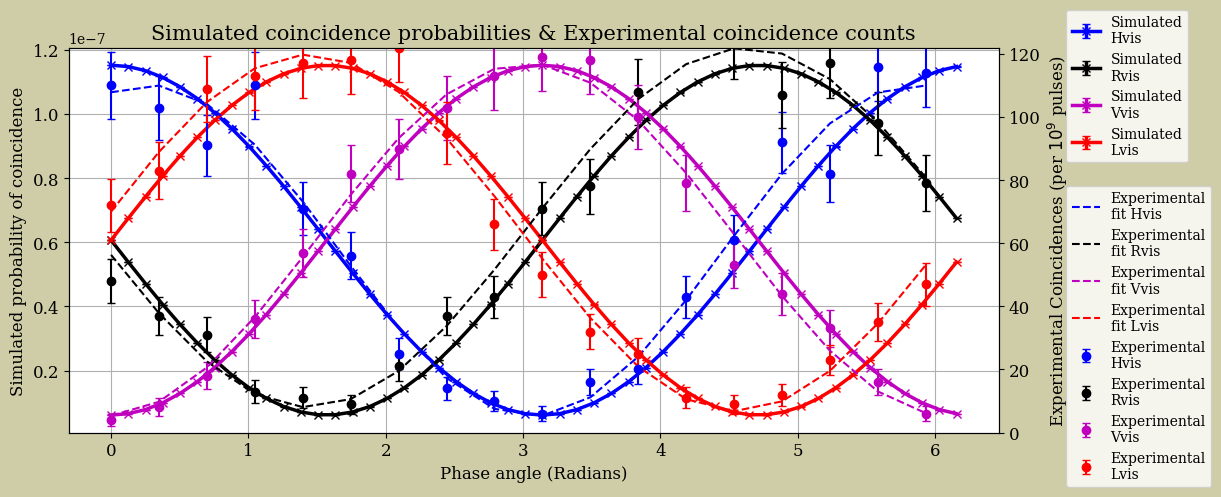

In [35]:
import matplotlib
matplotlib.rc('font',family='serif')

min_diff_index = 0
# idler_angles = [0, np.pi/2, np.pi, 3*np.pi/2]

avg_visibility = 0
for i in range(len(idler_angles)):
    visibility = (max(coincidences[min_diff_index][i]) - min(coincidences[min_diff_index][i]))/(max(coincidences[min_diff_index][i]) + min(coincidences[min_diff_index][i]))
    print("Visibility idler:",  visibility)
    avg_visibility += visibility/len(idler_angles)
print("Average visibility:", avg_visibility)

def sinusoid(x, a, b, c, d):
    return a * np.sin(b * x + c) + d

# Creating fitting curves
fringe_domain = np.array(params["phase_settings"])
params0, _ = optimize.curve_fit(sinusoid, fringe_domain, coincidences[min_diff_index][0], p0=(80,1,1,1))
params1, _ = optimize.curve_fit(sinusoid, fringe_domain, coincidences[min_diff_index][1], p0=(80,1,1,1))
params2, _ = optimize.curve_fit(sinusoid, fringe_domain, coincidences[min_diff_index][2], p0=(80,1,1,1))
params3, _ = optimize.curve_fit(sinusoid, fringe_domain, coincidences[min_diff_index][3], p0=(80,1,1,1))

exp_params0, _ = optimize.curve_fit(sinusoid, experimental_domain[:-1], H_data[:, 5][:-1], p0=(80,1,1,1))
exp_params1, _ = optimize.curve_fit(sinusoid, experimental_domain[:-1], L_data[:, 5][:-1], p0=(80,1,1,1))
exp_params2, _ = optimize.curve_fit(sinusoid, experimental_domain[:-1], V_data[:, 5][:-1], p0=(80,1,1,1))
exp_params3, _ = optimize.curve_fit(sinusoid, experimental_domain[:-1], R_data[:, 5][:-1], p0=(80,1,1,1))

TNRfont = {'fontname':'serif'}

# Now, creating actual plots.

# Create figure and first axis
fig, ax1 = plt.subplots(figsize=(12,5))
fig.patch.set_facecolor("#cfcda7")
plt.xticks(fontsize=12)
ax1.set_xlabel('Phase angle (Radians)', **TNRfont, fontsize = 12)
ax1.set_ylabel('Simulated probability of coincidence', **TNRfont, fontsize = 12)

# Plotting Simulation data
# ax1.plot(fringe_domain, coincidences[min_diff_index][0], 'bx', label = "Simulated\nHvis")
# ax1.plot(fringe_domain, coincidences[min_diff_index][1], 'kx', label = "Simulated\nLvis")
# ax1.plot(fringe_domain, coincidences[min_diff_index][2], 'mx', label = "Simulated\nVvis")
# ax1.plot(fringe_domain, coincidences[min_diff_index][3], 'rx', label = "Simulated\nRvis")

# Plotting sinusoidal fits
ax1.errorbar(fringe_domain, sinusoid(fringe_domain, *params0), yerr = coincidence_std[min_diff_index][0], fmt = 'b-x', capsize=3, label = "Simulated\nHvis", linewidth = 2.5)
ax1.errorbar(fringe_domain, sinusoid(fringe_domain, *params1), yerr = coincidence_std[min_diff_index][1], fmt = 'k-x', capsize=3, label = "Simulated\nRvis", linewidth = 2.5)
ax1.errorbar(fringe_domain, sinusoid(fringe_domain, *params2), yerr = coincidence_std[min_diff_index][2], fmt = 'm-x', capsize=3, label = "Simulated\nVvis", linewidth = 2.5)
ax1.errorbar(fringe_domain, sinusoid(fringe_domain, *params3), yerr = coincidence_std[min_diff_index][3], fmt = 'r-x', capsize=3, label = "Simulated\nLvis", linewidth = 2.5)

plt.legend(loc = 'upper left')

# # Shrink current axis by 20%
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])
plt.yticks(fontsize=12)
ax1.legend(loc='center left', bbox_to_anchor=(1.065, 0.9))


# Create second axis
ax2 = ax1.twinx()
ax2.set_ylim([0, max(max(H_data[:, 5][:-1]), max(V_data[:, 5][:-1]), max(L_data[:, 5][:-1]))])
ax2.set_ylabel(r'Experimental Coincidences (per $10^9$ pulses)', **TNRfont, fontsize = 12)

# plotting experimental data
ax2.errorbar(experimental_domain[:-1], H_data[:, 5][:-1], yerr = np.sqrt(H_data[:, 5][:-1]), fmt = 'bo', capsize=3, label = "Experimental\nHvis")
ax2.errorbar(experimental_domain[:-1], R_data[:, 5][:-1], yerr = np.sqrt(R_data[:, 5][:-1]), fmt = 'ko', capsize=3, label = "Experimental\nRvis")
ax2.errorbar(experimental_domain[:-1], V_data[:, 5][:-1], yerr = np.sqrt(V_data[:, 5][:-1]), fmt = 'mo', capsize=3, label = "Experimental\nVvis")
ax2.errorbar(experimental_domain[:-1], L_data[:, 5][:-1], yerr = np.sqrt(L_data[:, 5][:-1]), fmt = 'ro', capsize=3, label = "Experimental\nLvis")

# Plotting experimental sinusoidal fits
ax2.plot(experimental_domain[:-1], sinusoid(experimental_domain[:-1], *exp_params0), 'b',  label = "Experimental\nfit Hvis", linestyle='dashed')
ax2.plot(experimental_domain[:-1], sinusoid(experimental_domain[:-1], *exp_params3), 'k',  label = "Experimental\nfit Rvis", linestyle='dashed')
ax2.plot(experimental_domain[:-1], sinusoid(experimental_domain[:-1], *exp_params2), 'm',  label = "Experimental\nfit Vvis", linestyle='dashed')
ax2.plot(experimental_domain[:-1], sinusoid(experimental_domain[:-1], *exp_params1), 'r',  label = "Experimental\nfit Lvis", linestyle='dashed')



# # Put a legend to the right of the current axis
ax2.legend(loc='center left', bbox_to_anchor=(1.065, 0.25))

# plt.legend(loc = 'upper right')
plt.yticks(fontsize=12)
ax1.set_title("Simulated coincidence probabilities & Experimental coincidence counts", **TNRfont, fontsize = 15)
ax1.grid()
# plt.savefig("CLEO_data/output/coincidences.png", dpi = 500, bbox_inches='tight')




# # Plotting singles
# plt.figure(figsize = (5,2))
# # plt.ylim([max(max(idler_singles[min_diff_index]))-2e-5, 1e-5+max(max(signal_singles[min_diff_index]))])
# plt.ylim([0, 1e-5+max(max(idler_singles[min_diff_index]))])
# plt.plot(fringe_domain, signal_singles[min_diff_index][0], 'bx', label = "Hvis")
# plt.plot(fringe_domain, signal_singles[min_diff_index][1], 'kx', label = "Lvis")
# plt.plot(fringe_domain, signal_singles[min_diff_index][2], 'mx', label = "Vvis")
# plt.plot(fringe_domain, signal_singles[min_diff_index][3], 'rx', label = "Rvis")
# plt.title("Signal detector singles counts")
# plt.legend()
# plt.xlabel('Phase angle (Radians)')
# plt.ylabel('Probability of singles')

# plt.figure(figsize = (5,2))
# # plt.ylim([max(max(idler_singles[min_diff_index]))-2e-5, 1e-5+max(max(idler_singles[min_diff_index]))])
# plt.ylim([0, 1e-5+max(max(idler_singles[min_diff_index]))])
# plt.plot(fringe_domain, idler_singles[min_diff_index][0], 'bx', label = "Hvis")
# plt.plot(fringe_domain, idler_singles[min_diff_index][1], 'kx', label = "Lvis")
# plt.plot(fringe_domain, idler_singles[min_diff_index][2], 'mx', label = "Vvis")
# plt.plot(fringe_domain, idler_singles[min_diff_index][3], 'rx', label = "Rvis")
# plt.title("Idler detector singles counts")
# plt.legend()
# plt.xlabel('Phase angle (Radians)')
# plt.ylabel('Probability of singles')
# plt.show()

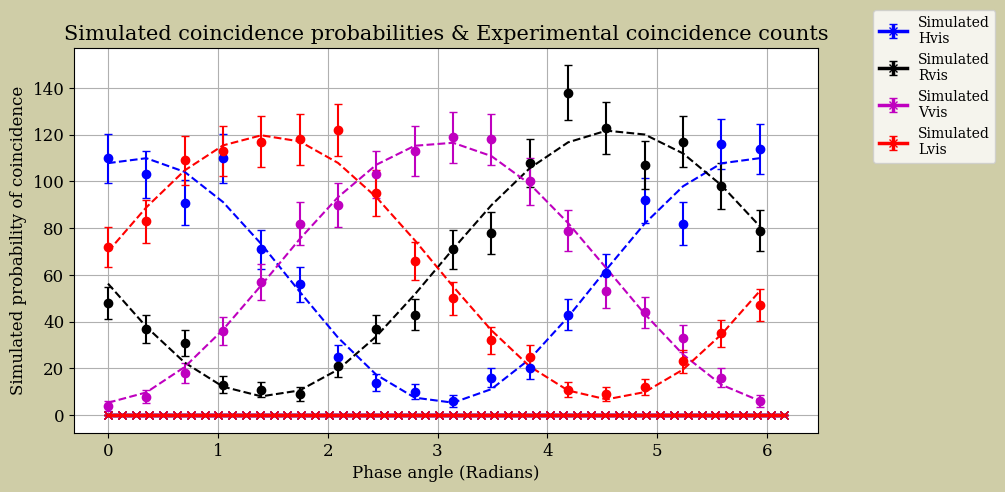

In [26]:
fig, ax1 = plt.subplots(figsize=(12,5))
fig.patch.set_facecolor("#cfcda7")
plt.xticks(fontsize=12)
ax1.set_xlabel('Phase angle (Radians)', **TNRfont, fontsize = 12)
ax1.set_ylabel('Simulated probability of coincidence', **TNRfont, fontsize = 12)

# Plotting Simulation data
# ax1.plot(fringe_domain, coincidences[min_diff_index][0], 'bx', label = "Simulated\nHvis")
# ax1.plot(fringe_domain, coincidences[min_diff_index][1], 'kx', label = "Simulated\nLvis")
# ax1.plot(fringe_domain, coincidences[min_diff_index][2], 'mx', label = "Simulated\nVvis")
# ax1.plot(fringe_domain, coincidences[min_diff_index][3], 'rx', label = "Simulated\nRvis")

# Plotting sinusoidal fits
ax1.errorbar(fringe_domain, sinusoid(fringe_domain, *params0), yerr = coincidence_std[min_diff_index][0], fmt = 'b-x', capsize=3, label = "Simulated\nHvis", linewidth = 2.5)
ax1.errorbar(fringe_domain, sinusoid(fringe_domain, *params1), yerr = coincidence_std[min_diff_index][1], fmt = 'k-x', capsize=3, label = "Simulated\nRvis", linewidth = 2.5)
ax1.errorbar(fringe_domain, sinusoid(fringe_domain, *params2), yerr = coincidence_std[min_diff_index][2], fmt = 'm-x', capsize=3, label = "Simulated\nVvis", linewidth = 2.5)
ax1.errorbar(fringe_domain, sinusoid(fringe_domain, *params3), yerr = coincidence_std[min_diff_index][3], fmt = 'r-x', capsize=3, label = "Simulated\nLvis", linewidth = 2.5)

plt.legend(loc = 'upper left')

# # Shrink current axis by 20%
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])
plt.yticks(fontsize=12)
ax1.legend(loc='center left', bbox_to_anchor=(1.065, 0.9))

ax1.errorbar(experimental_domain[:-1], H_data[:, 5][:-1], yerr = np.sqrt(H_data[:, 5][:-1]), fmt = 'bo', capsize=3, label = "Experimental\nHvis")
ax1.errorbar(experimental_domain[:-1], R_data[:, 5][:-1], yerr = np.sqrt(R_data[:, 5][:-1]), fmt = 'ko', capsize=3, label = "Experimental\nRvis")
ax1.errorbar(experimental_domain[:-1], V_data[:, 5][:-1], yerr = np.sqrt(V_data[:, 5][:-1]), fmt = 'mo', capsize=3, label = "Experimental\nVvis")
ax1.errorbar(experimental_domain[:-1], L_data[:, 5][:-1], yerr = np.sqrt(L_data[:, 5][:-1]), fmt = 'ro', capsize=3, label = "Experimental\nLvis")

# Plotting experimental sinusoidal fits
ax1.plot(experimental_domain[:-1], sinusoid(experimental_domain[:-1], *exp_params0), 'b',  label = "Experimental\nfit Hvis", linestyle='dashed')
ax1.plot(experimental_domain[:-1], sinusoid(experimental_domain[:-1], *exp_params3), 'k',  label = "Experimental\nfit Rvis", linestyle='dashed')
ax1.plot(experimental_domain[:-1], sinusoid(experimental_domain[:-1], *exp_params2), 'm',  label = "Experimental\nfit Vvis", linestyle='dashed')
ax1.plot(experimental_domain[:-1], sinusoid(experimental_domain[:-1], *exp_params1), 'r',  label = "Experimental\nfit Lvis", linestyle='dashed')

plt.yticks(fontsize=12)
ax1.set_title("Simulated coincidence probabilities & Experimental coincidence counts", **TNRfont, fontsize = 15)
ax1.grid()

### Keep Commented unless data is to be overwritten. 

In [10]:
# Data storage. Uncomment to save created data (parameters and data)

# import json 
# fitting_data = {"signal_singles":signal_singles, "idler_singles":idler_singles, "coincidences":coincidences}
# exp_params = params
# exp_params["det_effs"] = det_effs
# exp_params["idler_angles"] = idler_angles
# print(fitting_data)
# print(exp_params)
# total_data = [fitting_data, exp_params]
# exp_params["det_effs"] = list(exp_params["det_effs"])
# exp_params["phase_settings"] = list(exp_params["phase_settings"])
# with open('CLEO_data/output/coincidences.json', 'w') as f:
#     json.dump(total_data, f)


### Sweeping for parameter estimation. 
Don't execute if running only one experiment.  

In [38]:
# This is the average coincidence probability for the 4 measurement basis for 4 seconds of 250MHz pulsed opration
# (10^9 pulses in total) for the C22_C46 operation case in the CLEO paper. 

reference_probability = 117.25e-9

# To load a prev set of data
# with open('CLEO_data/output/coincidences.json') as f:
#     data = json.load(f)

# coincidences = data[0]["coincidences"]
# det_effs = data[1]["det_effs"]
# idler_angles = data[1]["idler_angles"]
# params = data[1]

# Using that refernece probability, we find the value of system attenuation that we sweeped over in the last cell 
# that corresponds to the least difference with the reference coincidence probability. 
peak_coincidence_probs = []
min_diff = 1
min_diff_index = -1
for i in range(len(det_effs)):
    # print(len(coincidences[i]))
    probability = max(coincidences[i][0])
    print(probability)
    diff = np.abs(probability - reference_probability)
    peak_coincidence_probs.append(probability - reference_probability)
    if diff < min_diff:
        min_diff_index = i
        min_diff = diff

print(f"system attenuation is: {det_effs[min_diff_index]} dB")


2.440337611468353e-07
2.2692257913414075e-07
2.1101108375547188e-07
1.9621517543481329e-07
1.824566490860105e-07
1.6966278041853335e-07
1.5776594288275398e-07
1.4670324962821428e-07
1.364162217720081e-07
1.2685047973605092e-07
1.179554550730011e-07
1.0968412465909026e-07
1.01992761197084e-07
9.484070281998459e-08
8.819013799457366e-08
8.200590601994804e-08
7.62553107345586e-08
7.090794826045575e-08
6.593554632104171e-08
6.13118144972163e-08
system attenuation is: -25.57894736842105 dB


10
det eff -25.657894736842103


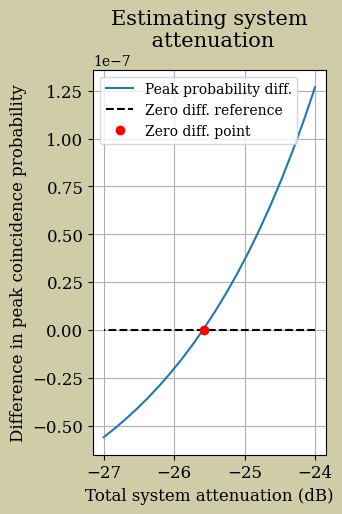

In [48]:
# Data acquisition and plotting
TNRfont = {'fontname':'serif'}
import json
from matplotlib import pyplot as plt

fig, ax1 = plt.subplots(figsize=(3,5))
fig.patch.set_facecolor("#cfcda7")
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.plot(det_effs, peak_coincidence_probs, label = "Peak probability diff.")
plt.plot(det_effs, [0]*len(det_effs), color = "black", linestyle='dashed', label = "Zero diff. reference")

f = np.array([0]*len(det_effs))
x = np.array(peak_coincidence_probs)
idx = np.argwhere(np.diff(np.sign(x - f))).flatten()[0]
print(idx)
plt.plot((det_effs[idx]), f[idx], 'ro', label = "Zero diff. point")
print("det eff", (det_effs[idx+1]+det_effs[idx])/2)
plt.title("Estimating system\n attenuation", **TNRfont, fontsize = 15)
plt.xlabel("Total system attenuation (dB)", **TNRfont, fontsize = 12)
ax1.set_ylabel("Difference in peak coincidence probability", **TNRfont, fontsize = 12)
plt.grid()
plt.legend()
# plt.savefig("CLEO_data/output/parameter_estimation.png", dpi = 500, bbox_inches='tight')

## Accuracy study

In [ ]:
# Working Run code
coincidences = []
idler_singles = []
signal_singles = []
truncation = [2,3,4,5,6]
det_effs = [-26.22] * len(truncation) # np.linspace(-24, -28, 10)
idler_angles = [0, np.pi/2, np.pi, 3*np.pi/2]

for eff, trunc in zip(det_effs, truncation):
    params["SIGNAL_DET_EFFICIENCY"] = 10**(eff/10)
    params["IDLER_DET_EFFICIENCY"] = 10**(eff/10)
    timeline = Timeline(1e12, formalism=POLARIZATION_FOCK_FORMALISM, truncation = trunc)
    signal_receiver, source_node = setup_network(timeline, params)

    for idler_phase in idler_angles:    

        print("\nNew Idler phase:", idler_phase)
        signal_receiver.rotateIdler(idler_phase)
        for signal_phase in params["phase_settings"]:
            timeline.init()
            print("New Signal phase:", signal_phase)
            signal_receiver.rotateSignal(signal_phase)

            for j in range(params["num_bs_trials_per_phase"]):
                source_node.start()
                timeline.run()

            signal_receiver.collectSignalData()
        signal_receiver.reset()

    new_coincidences, new_signal_singles, new_idler_singles = signal_receiver.get_data()
    signal_singles.append(new_signal_singles)
    idler_singles.append(new_idler_singles)
    coincidences.append(new_coincidences)

print(signal_singles) 
print(idler_singles)
print(coincidences)





receiver node

New Idler phase: 0
New Signal phase: 0.0
types: <class 'scipy.sparse._csr.csr_matrix'> <class 'scipy.sparse._csr.csr_matrix'> <class 'scipy.sparse._csr.csr_matrix'> <class 'scipy.sparse._csr.csr_matrix'> <class 'scipy.sparse._csr.csr_matrix'>
finding matrix exp
done finding matrix exp
finding matrix exp
done finding matrix exp
done calculating exponentials
TMSV state:
 ['0H0V_D 0H0V_C 0H0V_B 0H0V_A', '0H0V_D 0H0V_C 0H1V_B 0H1V_A', '0H0V_D 0H0V_C 0H2V_B 0H2V_A', '0H0V_D 0H0V_C 1H0V_B 1H0V_A', '0H0V_D 0H0V_C 1H1V_B 1H1V_A', '0H0V_D 0H0V_C 2H0V_B 2H0V_A']


/home/asingal/.local/lib/python3.10/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:412: SparseEfficiencyWarning: splu converted its input to CSC format
  warn('splu converted its input to CSC format', SparseEfficiencyWarning)
/home/asingal/.local/lib/python3.10/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:302: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  warn('spsolve is more efficient when sparse b '
/home/asingal/.local/lib/python3.10/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


New Signal phase: 0.41887902047863906
New Signal phase: 0.8377580409572781
New Signal phase: 1.2566370614359172
New Signal phase: 1.6755160819145563
New Signal phase: 2.0943951023931953
New Signal phase: 2.5132741228718345
New Signal phase: 2.9321531433504733
New Signal phase: 3.3510321638291125
New Signal phase: 3.7699111843077517
New Signal phase: 4.1887902047863905
New Signal phase: 4.607669225265029
New Signal phase: 5.026548245743669
New Signal phase: 5.445427266222308
New Signal phase: 5.864306286700947

New Idler phase: 1.5707963267948966
New Signal phase: 0.0
New Signal phase: 0.41887902047863906
New Signal phase: 0.8377580409572781
New Signal phase: 1.2566370614359172
New Signal phase: 1.6755160819145563
New Signal phase: 2.0943951023931953
New Signal phase: 2.5132741228718345
New Signal phase: 2.9321531433504733
New Signal phase: 3.3510321638291125
New Signal phase: 3.7699111843077517
New Signal phase: 4.1887902047863905
New Signal phase: 4.607669225265029
New Signal phase: 5

KeyboardInterrupt: 

In [ ]:
print(truncation)
for trunc in range(len(truncation)):
    avg_visibility = 0
    for i in range(len(idler_angles)):
        visibility = (max(coincidences[trunc][i]) - min(coincidences[trunc][i]))/(max(coincidences[trunc][i]) + min(coincidences[trunc][i]))
        print("Visibility idler:",  visibility)
        avg_visibility += visibility/len(idler_angles)
    print("Average visibility for trunc:", truncation[trunc], "is:", avg_visibility)


[2, 3, 4, 5, 6]
Visibility idler: 0.9033920905386789
Visibility idler: 0.9133089157472697
Visibility idler: 0.9217905468230013
Visibility idler: 0.9133089157472697
Average visibility for trunc: 2 is: 0.912950117214055
Visibility idler: 0.8905631142745536
Visibility idler: 0.9037458185867963
Visibility idler: 0.9084374829955114
Visibility idler: 0.9037458185867963
Average visibility for trunc: 3 is: 0.9016230586109144
Visibility idler: 0.8889359320685551
Visibility idler: 0.9026393922565429
Visibility idler: 0.9067443685224024
Visibility idler: 0.9026393922565429
Average visibility for trunc: 4 is: 0.9002397712760108
Visibility idler: 0.8887680856835641
Visibility idler: 0.9025200176558759
Visibility idler: 0.9065697282682443
Visibility idler: 0.9025200176558759
Average visibility for trunc: 5 is: 0.90009446231589
Visibility idler: 0.8887540415957492
Visibility idler: 0.9025086471825337
Visibility idler: 0.9065551143422329
Visibility idler: 0.9025086471825337
Average visibility for trun

## Running scaling study  

In [ ]:
# Working Run code
coincidences = []
idler_singles = []
signal_singles = []
# det_effs = np.linspace(-24, -28, 10) # np.linspace(-14, -18, 10)
truncation = range(2, 5+1)

params["MODE_NUM"] = 1
params["phase_settings"] = [0]


for trunc in truncation:
    # params["SIGNAL_DET_EFFICIENCY"] = 10**(eff/10)
    # params["IDLER_DET_EFFICIENCY"] = 10**(eff/10)
    timeline = Timeline(1e12, formalism=POLARIZATION_FOCK_FORMALISM, truncation = trunc)
    signal_receiver, source_node = setup_network(timeline, params)

    for idler_phase in [0]:    

        print("\nNew Idler phase:", idler_phase)
        signal_receiver.rotateIdler(idler_phase)
        for signal_phase in params["phase_settings"]:
            timeline.init()
            print("New Signal phase:", signal_phase)
            signal_receiver.rotateSignal(signal_phase)

            for j in range(params["num_bs_trials_per_phase"]):
                source_node.start()
                timeline.run()

            signal_receiver.collectSignalData()
        signal_receiver.reset()

#     new_coincidences, new_signal_singles, new_idler_singles = signal_receiver.get_data()
#     signal_singles.append(new_signal_singles)
#     idler_singles.append(new_idler_singles)
#     coincidences.append(new_coincidences)

# print(signal_singles) 
# print(idler_singles)
# print(coincidences)

receiver node

New Idler phase: 0
New Signal phase: 0
types: <class 'scipy.sparse._csr.csr_matrix'> <class 'scipy.sparse._csr.csr_matrix'> <class 'scipy.sparse._csr.csr_matrix'> <class 'scipy.sparse._csr.csr_matrix'> <class 'scipy.sparse._dia.dia_matrix'>
types: <class 'scipy.sparse._csr.csr_matrix'> <class 'scipy.sparse._csr.csr_matrix'> <class 'scipy.sparse._csr.csr_matrix'> <class 'scipy.sparse._csr.csr_matrix'> <class 'scipy.sparse._csr.csr_matrix'>
finding matrix exp
done finding matrix exp
finding matrix exp
done finding matrix exp
done calculating exponentials
TMSV state:
 ['0H0V_D 0H0V_C 0H0V_B 0H0V_A', '0H0V_D 0H0V_C 0H1V_B 0H1V_A', '0H0V_D 0H0V_C 0H2V_B 0H2V_A', '0H0V_D 0H0V_C 1H0V_B 1H0V_A', '0H0V_D 0H0V_C 1H1V_B 1H1V_A', '0H0V_D 0H0V_C 2H0V_B 2H0V_A']


/home/asingal/.local/lib/python3.10/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:412: SparseEfficiencyWarning: splu converted its input to CSC format
  warn('splu converted its input to CSC format', SparseEfficiencyWarning)
/home/asingal/.local/lib/python3.10/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:302: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  warn('spsolve is more efficient when sparse b '
/home/asingal/.local/lib/python3.10/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


mat dim: (81, 81) mat data: 80
mat dim: (9, 9) mat data: 6
receiver node

New Idler phase: 0
New Signal phase: 0
types: <class 'scipy.sparse._csr.csr_matrix'> <class 'scipy.sparse._csr.csr_matrix'> <class 'scipy.sparse._csr.csr_matrix'> <class 'scipy.sparse._csr.csr_matrix'> <class 'scipy.sparse._dia.dia_matrix'>
types: <class 'scipy.sparse._csr.csr_matrix'> <class 'scipy.sparse._csr.csr_matrix'> <class 'scipy.sparse._csr.csr_matrix'> <class 'scipy.sparse._csr.csr_matrix'> <class 'scipy.sparse._csr.csr_matrix'>
finding matrix exp
done finding matrix exp
finding matrix exp
done finding matrix exp
done calculating exponentials
TMSV state:
 ['0H0V_D 0H0V_C 0H0V_B 0H0V_A', '0H0V_D 0H0V_C 0H1V_B 0H1V_A', '0H0V_D 0H0V_C 0H2V_B 0H2V_A', '0H0V_D 0H0V_C 0H3V_B 0H3V_A', '0H0V_D 0H0V_C 1H0V_B 1H0V_A', '0H0V_D 0H0V_C 1H1V_B 1H1V_A', '0H0V_D 0H0V_C 1H2V_B 1H2V_A', '0H0V_D 0H0V_C 2H0V_B 2H0V_A', '0H0V_D 0H0V_C 2H1V_B 2H1V_A', '0H0V_D 0H0V_C 3H0V_B 3H0V_A']
mat dim: (256, 256) mat data: 328
mat dim: 

## Trying stuff out here

In [ ]:
# Working Run code
coincidences = []
idler_singles = []
signal_singles = []
# det_effs = np.linspace(-24, -28, 10) # np.linspace(-14, -18, 10)
truncation = [2]

params["MODE_NUM"] = 1
params["phase_settings"] = [0]


for trunc in truncation:
    # params["SIGNAL_DET_EFFICIENCY"] = 10**(eff/10)
    # params["IDLER_DET_EFFICIENCY"] = 10**(eff/10)
    timeline = Timeline(1e12, formalism=POLARIZATION_FOCK_FORMALISM, truncation = trunc)
    signal_receiver, source_node = setup_network(timeline, params)

    for idler_phase in [0]:    

        print("\nNew Idler phase:", idler_phase)
        signal_receiver.rotateIdler(idler_phase)
        for signal_phase in params["phase_settings"]:
            timeline.init()
            print("New Signal phase:", signal_phase)
            signal_receiver.rotateSignal(signal_phase)

            for j in range(params["num_bs_trials_per_phase"]):
                source_node.start()
                timeline.run()

            signal_receiver.collectSignalData()
        signal_receiver.reset()

#     new_coincidences, new_signal_singles, new_idler_singles = signal_receiver.get_data()
#     signal_singles.append(new_signal_singles)
#     idler_singles.append(new_idler_singles)
#     coincidences.append(new_coincidences)

# print(signal_singles) 
# print(idler_singles)
# print(coincidences)

receiver node

New Idler phase: 0


TypeError: loop of ufunc does not support argument 0 of type NoneType which has no callable sqrt method

In [ ]:
import scipy.sparse as sp
import numpy as np
from scipy.sparse.linalg import expm

N = 3

a = sp.csr_matrix(sp.diags(diagonals = np.sqrt(np.arange(1,N)), offsets = 1))
a_dag = a.T
I = sp.eye(N)

a_H = sp.kron(a, I, "csr")
a_V = sp.kron(I, a, "csr")
adag_H = sp.kron(a_dag, I, "csr")
adag_V = sp.kron(I, a_dag, "csr")
I = sp.eye(N**2)

a_V_Signal = sp.kron(a_H, I, "csr")
adag_V_Signal = sp.kron(adag_H, I, "csr")
a_V_Idler = sp.kron(I, a_H, "csr")
adag_V_Idler = sp.kron(I, adag_H, "csr")
II = sp.kron(I,I, "csr")

theta_V = np.pi/2

hamiltonian_V_Signal = theta_V * ( sp.kron(II, a_V_Signal, "csr")@sp.kron(adag_V_Signal,II, "csr") - sp.kron(a_V_Signal, II, "csr")@sp.kron(II, adag_V_Signal, "csr") )

def _find_mat_exp(mat):
    ans = sp.eye(mat.shape[0])
    intermediate = 1
    print("finding matrix exp")
    for i in range(1, 100+1):
        # print("done one iteration")
        intermediate *= mat/i
        # intermediate.data = np.round(intermediate.data, 10)
        # print("num_elements:", len(intermediate.data))
        intermediate.eliminate_zeros()
        ans += intermediate
        # temp.data = intermediate / factorial(i)
    print("done finding matrix exp")
    return ans

diff = expm(hamiltonian_V_Signal) - _find_mat_exp(hamiltonian_V_Signal)
diff.data = np.round(diff.data, 14)
diff.eliminate_zeros()
print(diff.data)
# print(_find_mat_exp(a))

# a = sp.csr_matrix()

/home/asingal/.local/lib/python3.10/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:412: SparseEfficiencyWarning: splu converted its input to CSC format
  warn('splu converted its input to CSC format', SparseEfficiencyWarning)
/home/asingal/.local/lib/python3.10/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:302: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  warn('spsolve is more efficient when sparse b '


finding matrix exp
done finding matrix exp
[]


In [ ]:
import scipy.sparse as sp

a = sp.csr_matrix([[1+1j, 1],[2j,3]])
print(a.A)
b = a.conjugate().transpose().A
print(b)
c = a@b
print(c)

[[1.+1.j 1.+0.j]
 [0.+2.j 3.+0.j]]
[[1.-1.j 0.-2.j]
 [1.+0.j 3.+0.j]]
[[ 3.+0.j  5.-2.j]
 [ 5.+2.j 13.+0.j]]


Text(0.5, 1.0, "Yoyo What's up man?")

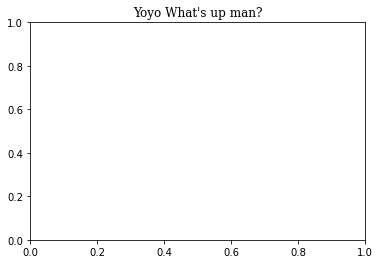

In [ ]:
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import font_manager 
fig, ax = plt.subplots()
fm = matplotlib.font_manager
fm._get_fontconfig_fonts.cache_clear()
ax.set_title("Yoyo What's up man?", fontname = "serif")

In [ ]:
# Just trying stuff out
from scipy import sparse as sp
from src.components.polarizationFock.quantum_manager import QuantumManagerPolarizationFock
from scipy.linalg import sqrtm

import numpy as np
N = 2
matrix = sp.csr_matrix(np.eye(N**2))
matrix[1,0] = 2

# print("dqrtm:", sqrtm(matrix))


print(matrix.A)

values = tuple(matrix.data)
x_indices, y_indices = tuple(map(tuple, matrix.nonzero()))
mat_data = (values, (x_indices, y_indices))
print(type(mat_data[1][0]))


# mat = sp.csr_matrix((mat_data), (N**2, N**2)).A
# print("the orifinal matrix was:\n", mat)
# sp.csr_matrix(((1,2,3),((1,2,3),(1,1,1))), [4,4])
# print(list(zip(values, indices)))



# a = sp.csr_matrix((2,2))
# a[0,0] = 1
# a[1,0] = 2
# a[0,1] = 3
# a[1,1] = 4
# print(a.A)
# print("power")
# print(a.A)
# power = 2
# if power:
#     a = a**power
# else:
#     a = sp.eye(a.shape[0])
# print(a.A)


[[1. 0. 0. 0.]
 [2. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
<class 'tuple'>


/home/asingal/.local/lib/python3.10/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


In [ ]:
def _prepare_operator(all_keys, keys, operator):
    # pad operator with identity
    N = 2
    dim = N**2
    left_dim = dim ** all_keys.index(keys[0])
    right_dim = dim ** (len(all_keys) - all_keys.index(keys[-1]) - 1)
    prepared_operator = operator

    if left_dim > 0:
        prepared_operator = sp.kron(sp.eye(left_dim), prepared_operator)
    if right_dim > 0:
        prepared_operator = sp.kron(prepared_operator, sp.eye(right_dim))

    return prepared_operator

_prepare_operator([1,2], [2], sp.eye(4))


<16x16 sparse matrix of type '<class 'numpy.float64'>'
	with 16 stored elements (blocksize = 1x1) in Block Sparse Row format>

## Trying stuff ends here 

# Parallel Code
from multiprocessing import Process
from json import dump
# Experimental Run code
coincidences = []
idler_singles = []
signal_singles = []

def run_simulations(idler_phase):
    print("\nNew Idler phase:", idler_phase)
    signal_receiver.reset()
    signal_receiver.rotateIdler(idler_phase)
    for signal_phase in params["phase_settings"]:
        timeline.init()
        print("New Signal phase:", signal_phase, "(Idler:", idler_phase, ")")
        signal_receiver.rotateSignal(signal_phase)

        source_node.start()
        timeline.run()

    new_signal_singles, new_idler_singles, new_coincidences = signal_receiver.get_data()
    # signal_singles.append(new_signal_singles)
    # idler_singles.append(new_idler_singles)
    # coincidences.append(new_coincidences)
    out_dict = {"signal":new_signal_singles, "idler":new_idler_singles, "coincidence":new_coincidences}
    f = open(f"results/polarization/first/outdata{idler_phase}.json", "w")
    dump(out_dict, f)

for idler_phase in [0, np.pi/2, np.pi, 3*np.pi/2]:
    p = Process( target=run_simulations, args=(idler_phase,) )
    p.start()
    p.join()
    


## Data representation

# Working data representation

def sinusoid(x, a, b, c, d):
    return a * np.sin(b * x + c) + d

fringe_domain = params["phase_settings"]

params0, _ = optimize.curve_fit(sinusoid, fringe_domain, coincidences[0], p0=(80,1,1,1))
params1, _ = optimize.curve_fit(sinusoid, fringe_domain, coincidences[1], p0=(80,1,1,1))
params2, _ = optimize.curve_fit(sinusoid, fringe_domain, coincidences[2], p0=(80,1,1,1))
params3, _ = optimize.curve_fit(sinusoid, fringe_domain, coincidences[3], p0=(80,1,1,1))


plt.figure(figsize=(15,4))
plt.ylim([0, max(max(coincidences))])
plt.plot(fringe_domain, coincidences[0], 'bo')
plt.plot(fringe_domain, coincidences[1], 'ko')
plt.plot(fringe_domain, coincidences[2], 'mo')
plt.plot(fringe_domain, coincidences[3], 'ro')

plt.plot(fringe_domain, sinusoid(fringe_domain, *params0), 'b',  label = "Hvis", linewidth = 3)
plt.plot(fringe_domain, sinusoid(fringe_domain, *params1), 'k',  label = "Dvis", linewidth = 3)
plt.plot(fringe_domain, sinusoid(fringe_domain, *params2), 'm',  label = "Vvis", linewidth = 3)
plt.plot(fringe_domain, sinusoid(fringe_domain, *params3), 'r',  label = "Avis", linewidth = 3)

plt.title("Coincidences")
plt.legend()
plt.xlabel('Phase angle')
plt.ylabel('Number of coincidences')


plt.figure()
plt.ylim([0, max(max(signal_singles))])
plt.plot(fringe_domain, signal_singles[0], 'bx', label = "Hvis")
plt.plot(fringe_domain, signal_singles[1], 'kx', label = "Dvis")
plt.plot(fringe_domain, signal_singles[2], 'mx', label = "Vvis")
plt.plot(fringe_domain, signal_singles[3], 'rx', label = "Avis")
plt.title("Signal detector singles counts")
plt.legend()


plt.figure()
plt.ylim([0, max(max(idler_singles))])
plt.plot(fringe_domain, idler_singles[0], 'bx', label = "Hvis")
plt.plot(fringe_domain, idler_singles[1], 'kx', label = "Dvis")
plt.plot(fringe_domain, idler_singles[2], 'mx', label = "Vvis")
plt.plot(fringe_domain, idler_singles[3], 'rx', label = "Avis")
plt.title("Idler detector singles counts")
plt.legend()

plt.show()

from json import load
coincidences = []
signal_singles = []
idler_singles = []

for idler_phase in [0, np.pi/2, np.pi, 3*np.pi/2]:
    f = open(f"results/polarization/first/outdata{idler_phase}.json", 'r')
    data = load(f)
    coincidences.append(data["coincidence"])
    signal_singles.append(data["signal"])
    idler_singles.append(data["idler"])

def sinusoid(x, a, b, c, d):
    return a * np.sin(b * x + c) + d

fringe_domain = params["phase_settings"]

params0, _ = optimize.curve_fit(sinusoid, fringe_domain, coincidences[0], p0=(80,1,1,1))
params1, _ = optimize.curve_fit(sinusoid, fringe_domain, coincidences[1], p0=(80,1,1,1))
params2, _ = optimize.curve_fit(sinusoid, fringe_domain, coincidences[2], p0=(80,1,1,1))
params3, _ = optimize.curve_fit(sinusoid, fringe_domain, coincidences[3], p0=(80,1,1,1))


plt.figure(figsize=(15,4))
plt.ylim([0, max(max(coincidences))])
plt.plot(fringe_domain, coincidences[0], 'bo')
plt.plot(fringe_domain, coincidences[1], 'ko')
plt.plot(fringe_domain, coincidences[2], 'mo')
plt.plot(fringe_domain, coincidences[3], 'ro')

plt.plot(fringe_domain, sinusoid(fringe_domain, *params0), 'b',  label = "Hvis", linewidth = 3)
plt.plot(fringe_domain, sinusoid(fringe_domain, *params1), 'k',  label = "Dvis", linewidth = 3)
plt.plot(fringe_domain, sinusoid(fringe_domain, *params2), 'm',  label = "Vvis", linewidth = 3)
plt.plot(fringe_domain, sinusoid(fringe_domain, *params3), 'r',  label = "Avis", linewidth = 3)

plt.title("Coincidences")
plt.legend()
plt.xlabel('Phase angle')
plt.ylabel('Number of coincidences')


plt.figure()
plt.ylim([0, max(max(signal_singles))])
plt.plot(fringe_domain, signal_singles[0], 'bx', label = "Hvis")
plt.plot(fringe_domain, signal_singles[1], 'kx', label = "Dvis")
plt.plot(fringe_domain, signal_singles[2], 'mx', label = "Vvis")
plt.plot(fringe_domain, signal_singles[3], 'rx', label = "Avis")
plt.title("Signal detector singles counts")
plt.legend()


plt.figure()
plt.ylim([0, max(max(idler_singles))])
plt.plot(fringe_domain, idler_singles[0], 'bx', label = "Hvis")
plt.plot(fringe_domain, idler_singles[1], 'kx', label = "Dvis")
plt.plot(fringe_domain, idler_singles[2], 'mx', label = "Vvis")
plt.plot(fringe_domain, idler_singles[3], 'rx', label = "Avis")
plt.title("Idler detector singles counts")
plt.legend()

plt.show()